In [58]:
from tbparse import SummaryReader
import matplotlib.pyplot as plt


In [59]:
log_dir = "./a2c_bipedalwalker_tensorboard/"

ppo_results = []

for i in range(1, 11):
    reader = SummaryReader(log_dir + f'PPO_{i}')
    ppo_results.append(reader.scalars)
    
ppo_summed = ppo_results[0]

for i in range(1,10):
    ppo_summed['value'] = ppo_summed['value'] + ppo_results[i]['value']
    
ppo_summed['value'] = ppo_summed['value'] / 10
print(ppo_summed)

      step                  tag       value
0     2048  rollout/ep_len_mean  652.335361
1     4096  rollout/ep_len_mean  603.534848
2     6144  rollout/ep_len_mean  660.667847
3     8192  rollout/ep_len_mean  585.977277
4    10240  rollout/ep_len_mean  632.143002
..     ...                  ...         ...
310  43008     train/value_loss    3.494358
311  45056     train/value_loss   10.552906
312  47104     train/value_loss   12.585502
313  49152     train/value_loss    6.572298
314  51200     train/value_loss    6.228907

[315 rows x 3 columns]


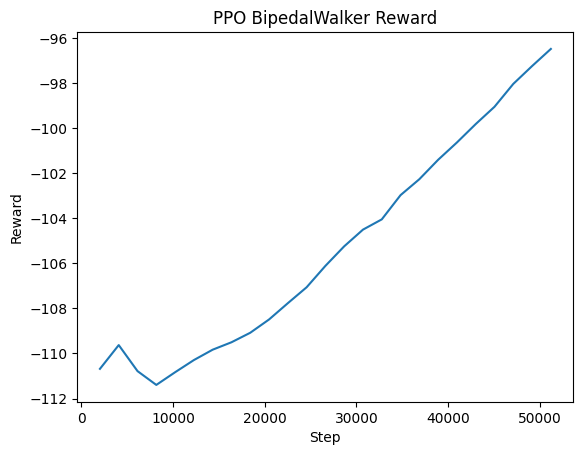

In [60]:
ppo_reward = ppo_summed
ppo_reward = ppo_reward[ppo_reward['tag'] == 'rollout/ep_rew_mean']

# draw the plot
plt.plot(ppo_reward['step'], ppo_reward['value'])
plt.title('PPO BipedalWalker Reward')
plt.xlabel('Step')
plt.ylabel('Reward')
plt.show()


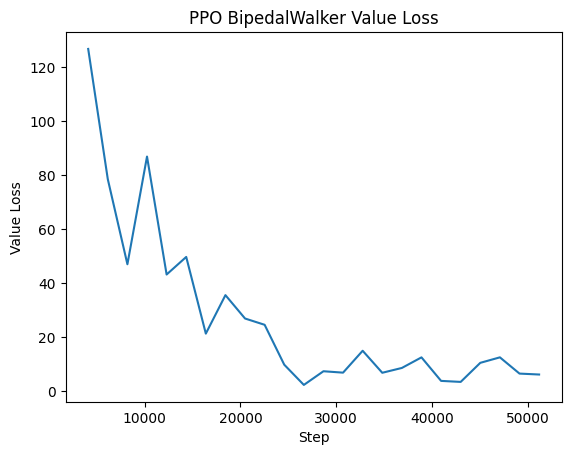

In [61]:
ppo_value_loss = ppo_summed
ppo_value_loss = ppo_value_loss[ppo_value_loss['tag'] == 'train/value_loss']

# draw the plot
plt.plot(ppo_value_loss['step'], ppo_value_loss['value'])
plt.title('PPO BipedalWalker Value Loss')
plt.xlabel('Step')
plt.ylabel('Value Loss')
plt.show()

In [62]:
#save the results
# writer = SummaryWriter(log_dir + 'PPO')